# SUPPORT VECTOR MACHINES ASSIGNMENT

# 1) Prepare a classification model using SVM for salary data 


In [1]:
import pandas as pd
import numpy as np

In [2]:
Test_1 = pd.read_csv("SalaryData_Test(1).csv")
Train_1=pd.read_csv("SalaryData_Train(1).csv")

In [3]:
df_tmp = Test_1.append(Train_1)
test= Test_1.copy()
train = Train_1.copy()

C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_12420\2733224625.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tmp = Test_1.append(Train_1)


In [4]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
number = LabelEncoder()
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [8]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [9]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [10]:
mapping = {' >50K': 1, ' <=50K': 2}
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})
df = train.append(test) 
df1 = df.copy()
df1.head()

C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_12420\108736536.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [11]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [12]:
df1.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns


<Axes: >

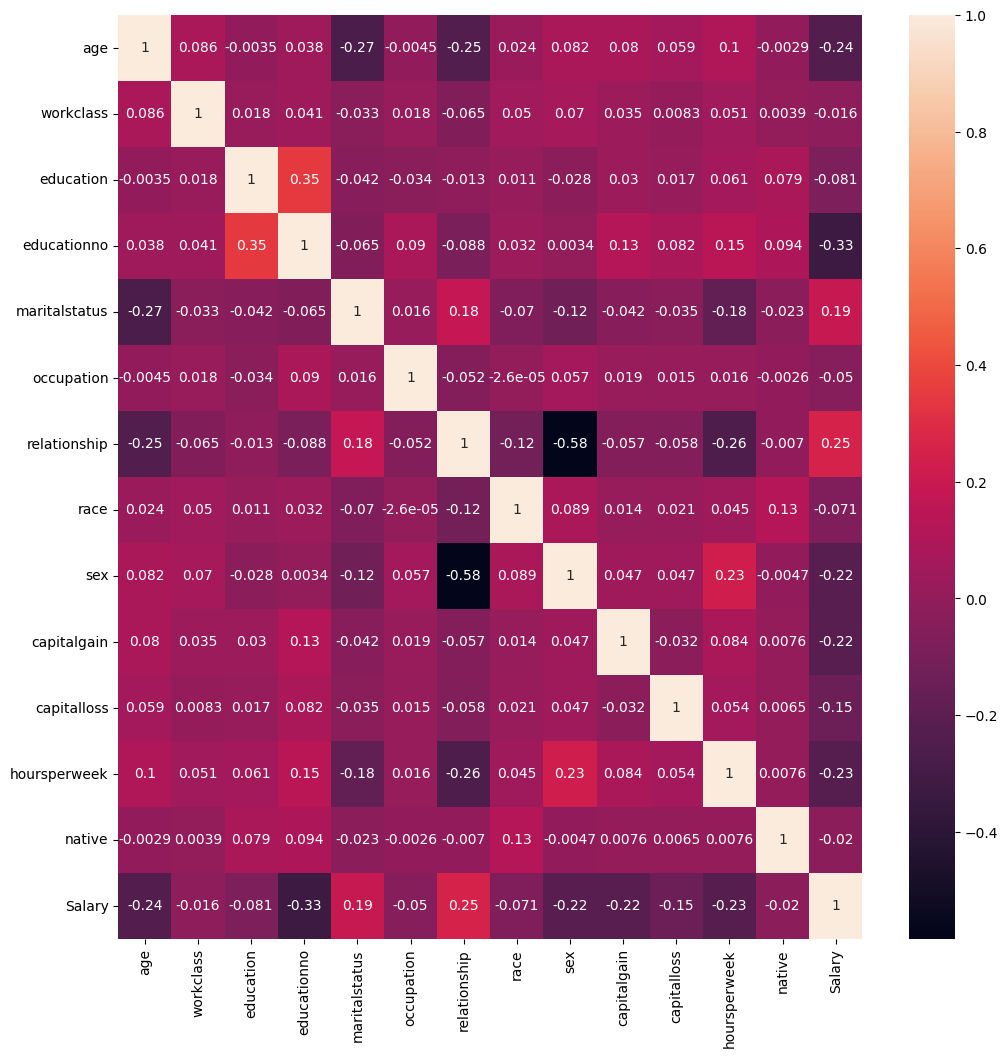

In [14]:
corr = df1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_12420\3449773765.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['educationno'],shade=True,color='g')


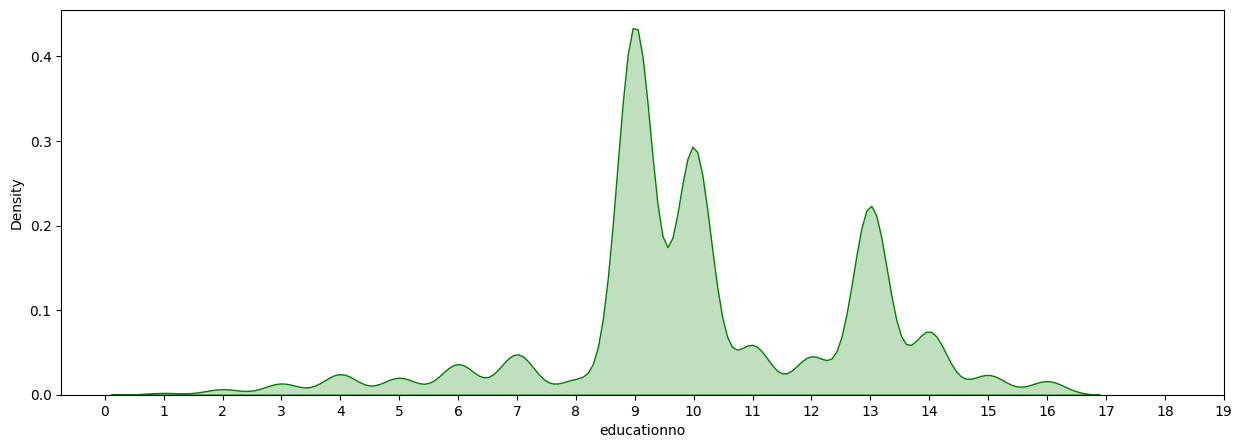

In [15]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(15,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [16]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()


C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_12420\3394351753.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_12420\3394351753.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_12420\3394351753.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_12420\3394351753.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an erro

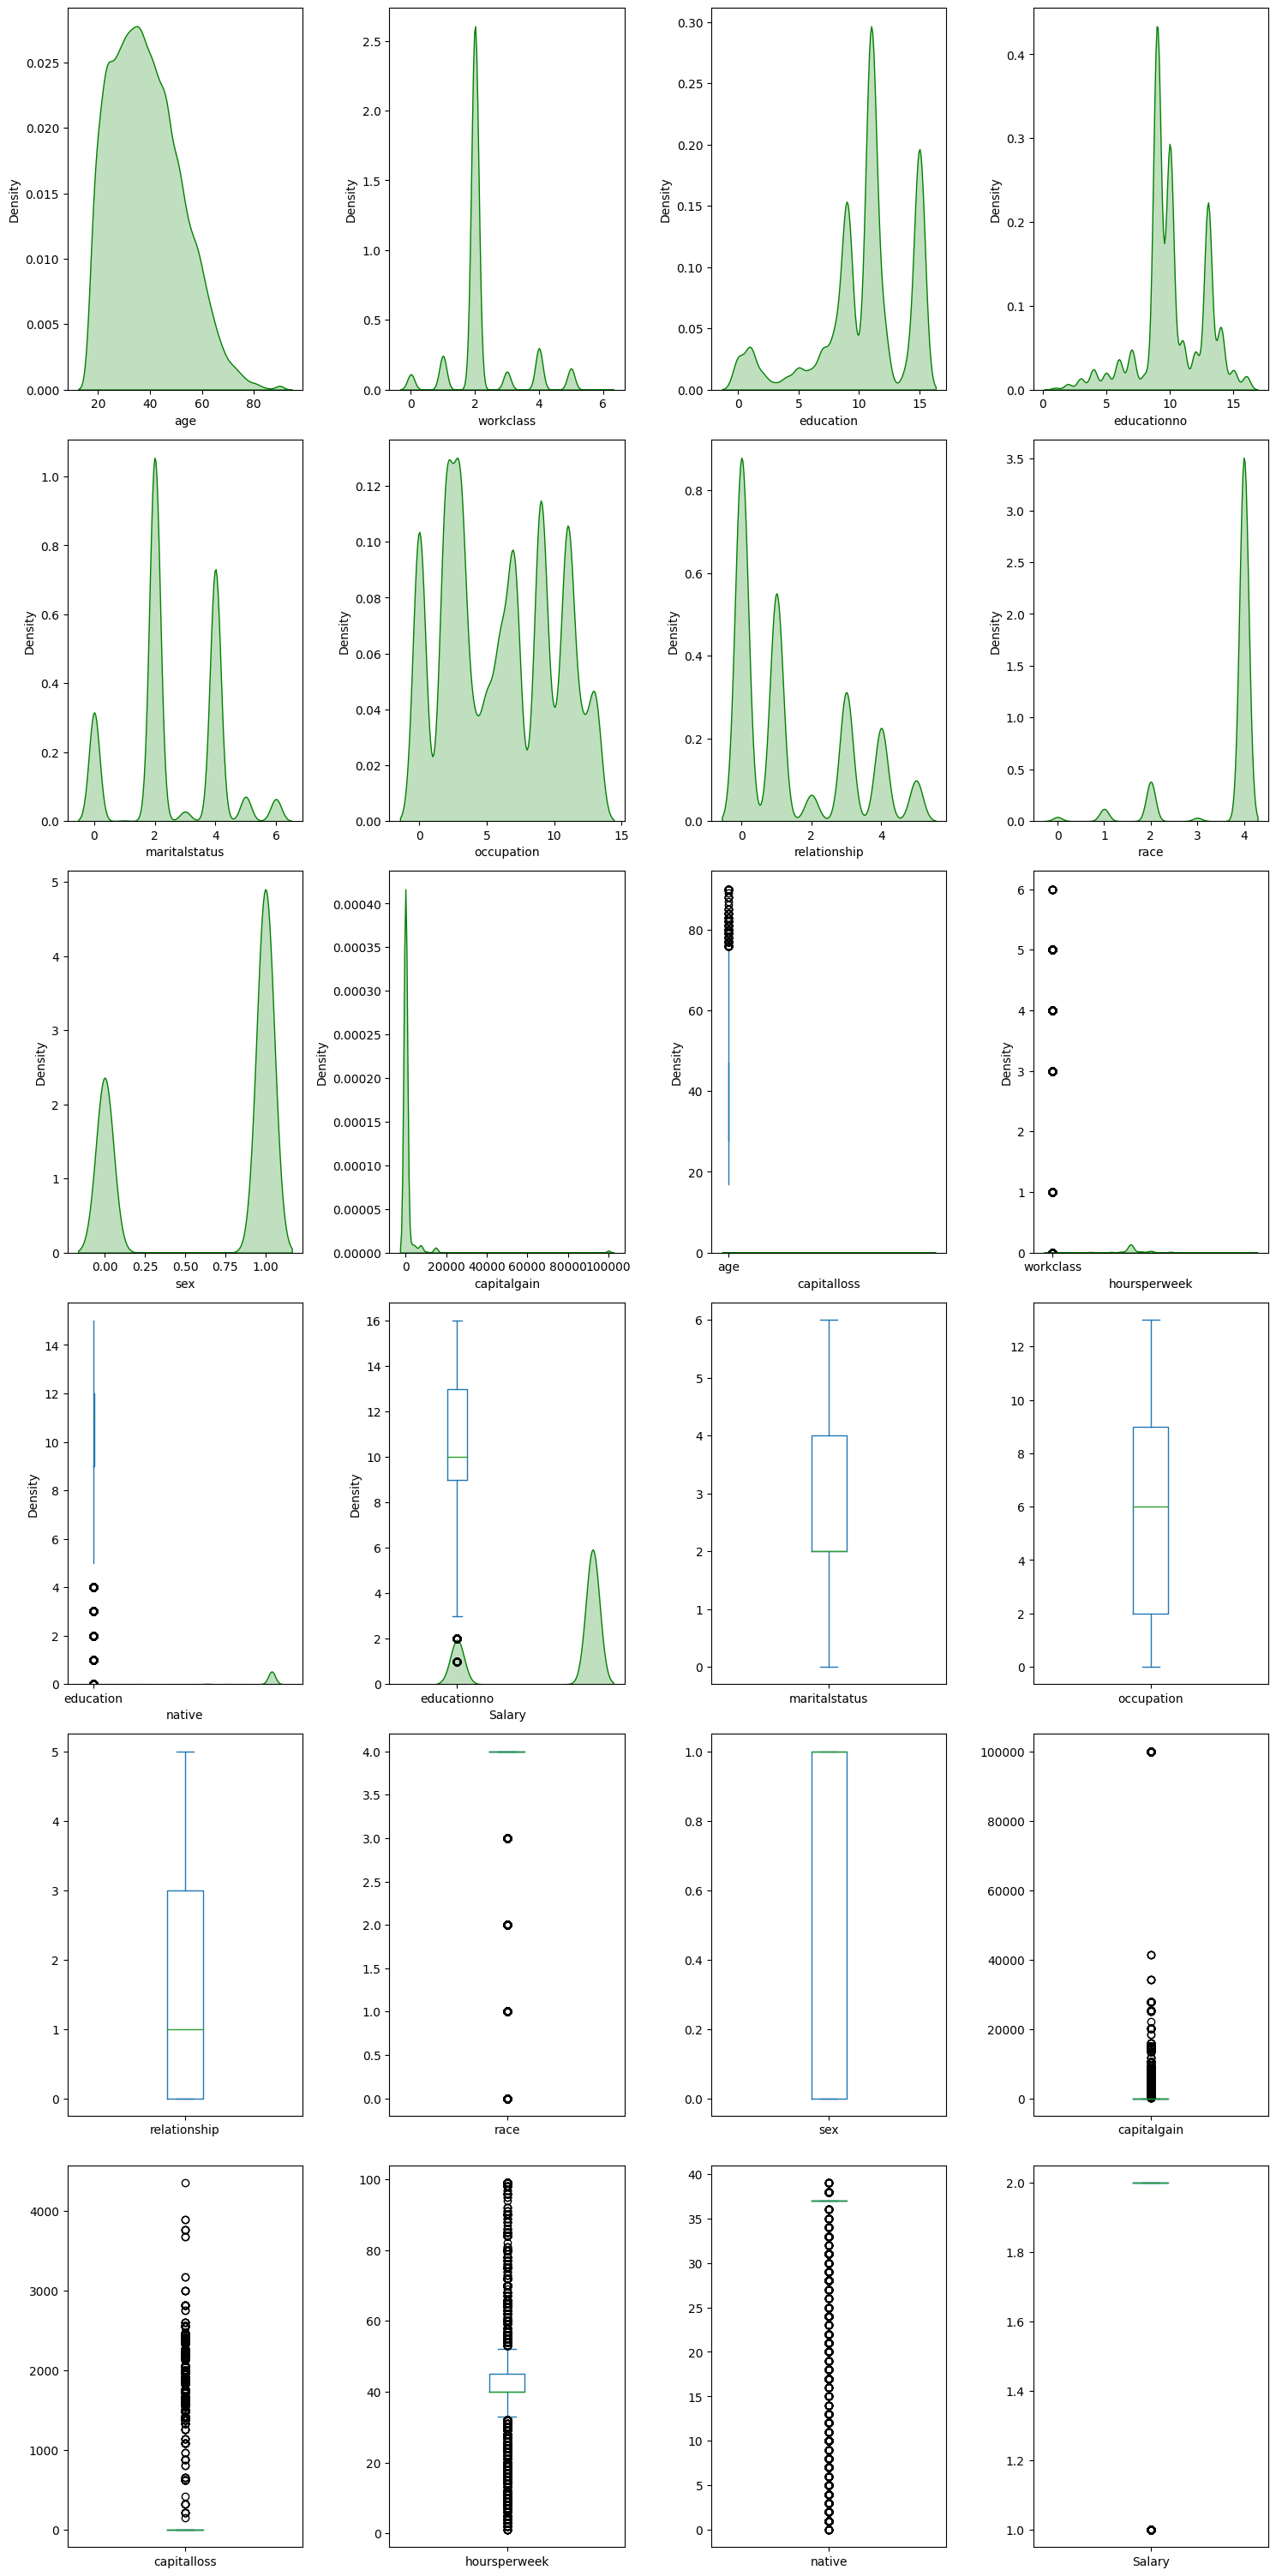

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
skewness,0.532784,1.148931,-0.945666,-0.310621,-0.006760,0.107141,0.829192,-2.518388,-0.747594,11.788871,4.517536,0.340536,-4.173813,-1.168041
kurtosis,-0.155931,2.329983,0.773506,0.635045,-0.538981,-1.249883,-0.697095,5.350390,-1.441168,150.147899,19.376085,3.201287,17.322823,-0.635709


In [17]:
plt.figure(figsize=(15,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
col = df1.columns
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [19]:
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn import metrics

In [20]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8096945551128818


In [21]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8434926958831341


In [22]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8432934926958832


In [23]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.5768924302788845


# 2)classify the Size_Categorie using SVM


In [24]:
forest=pd.read_csv("forestfires.csv")

In [25]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [26]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

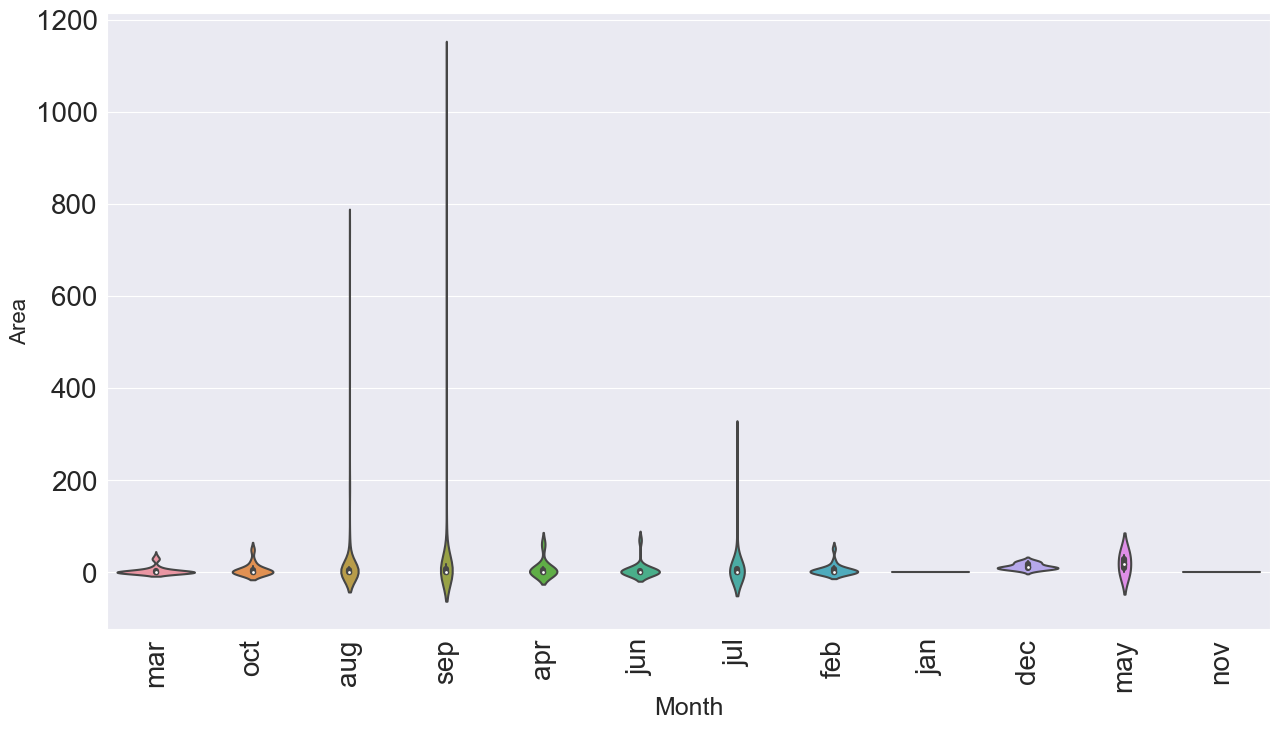

In [28]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'month', y= "area",data = forest)
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Area', fontsize=16)

plt.show()

In [29]:
forest['area_km'] = forest['area'] / 100

forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area_km
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,0.0


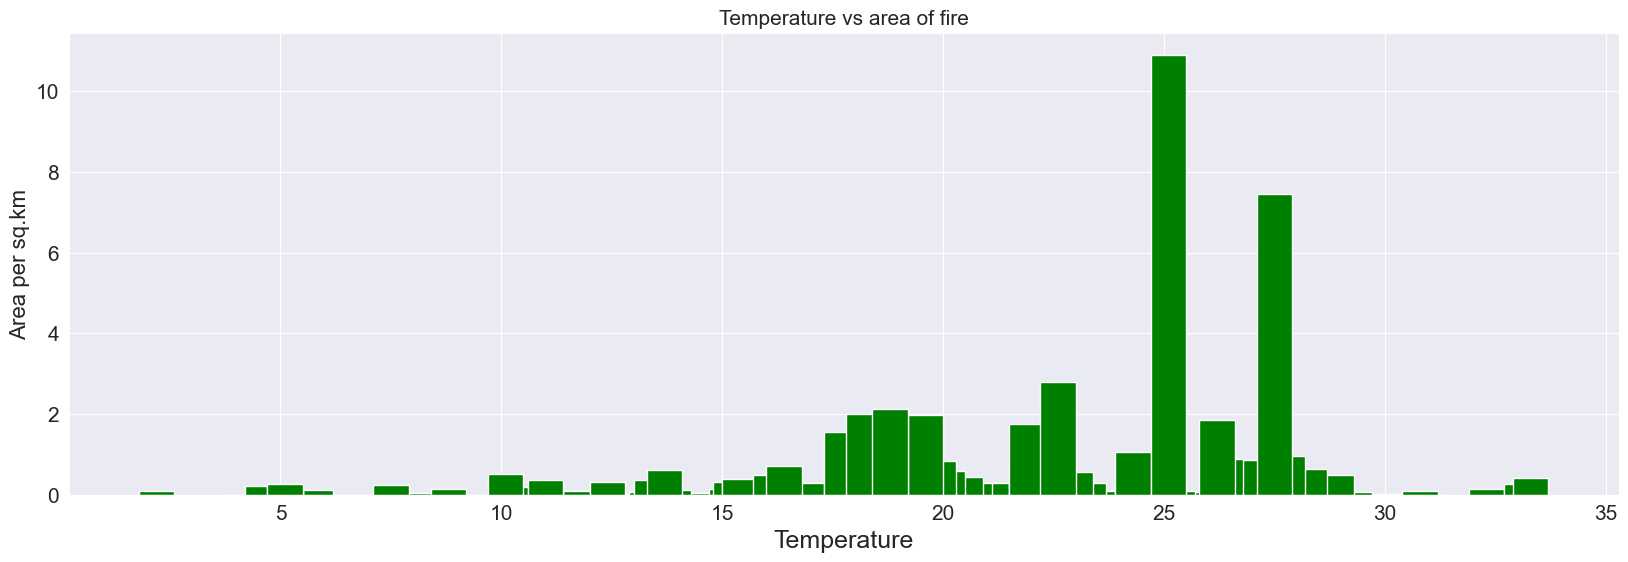

In [30]:
highest_fire_area = forest.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(20, 6))

plt.title("Temperature vs area of fire" , fontsize=15)
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'], color = "green")

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Temperature',fontsize=18)
plt.ylabel('Area per sq.km', fontsize=16)
plt.show()

In [31]:
numerical_feature = forest.describe(include=["int", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep', 'area_km']


In [32]:
categorical_feature = forest.describe(include=["object"]).columns

print(list(categorical_feature))

['month', 'day', 'size_category']


# For Categorical Features

Index(['month', 'day', 'size_category'], dtype='object')


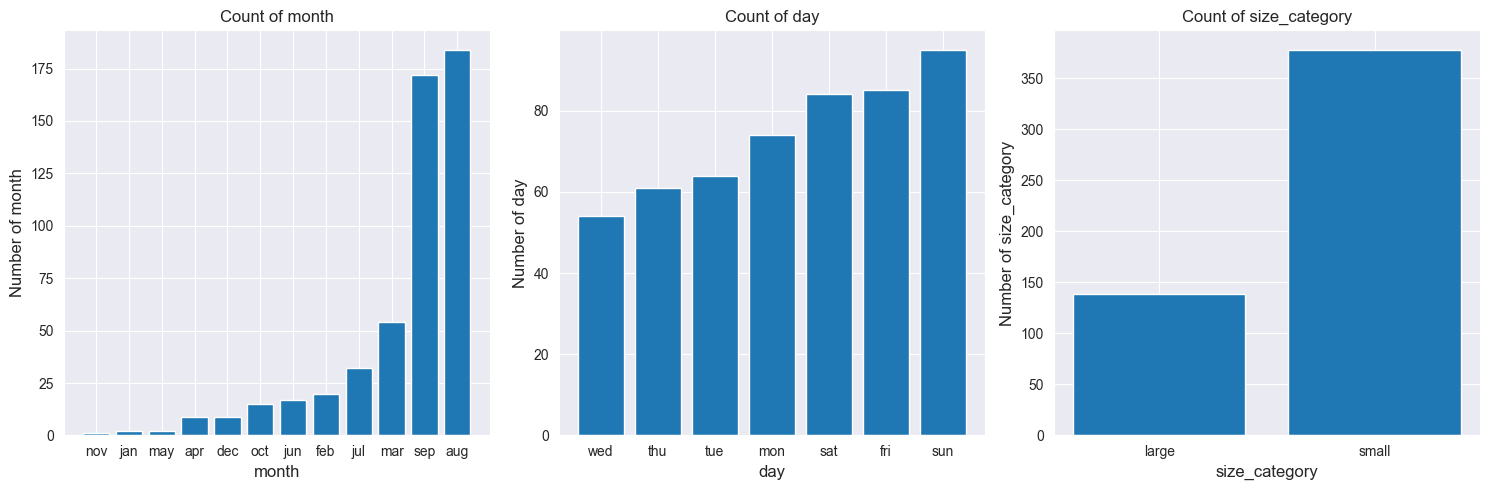

In [33]:
print(categorical_feature)


plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = forest.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

# For Numerical Features

In [34]:
sns.set_style('ticks')
sns.pairplot(forest[numerical_feature])
plt.show()


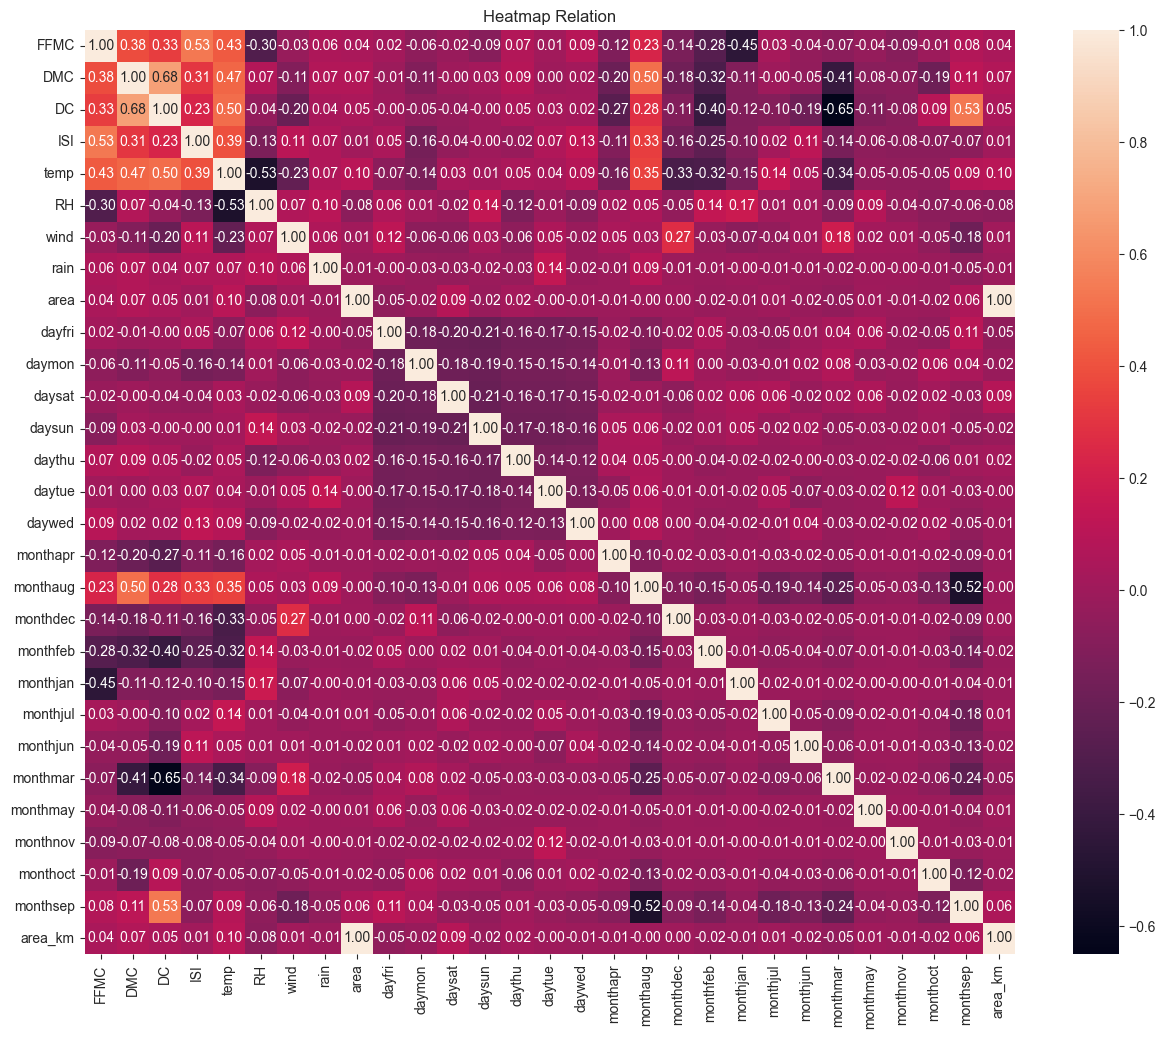

In [35]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(forest[numerical_feature].corr(), annot=True, fmt='.2f');

In [36]:
forest.drop(["month","day"],axis=1,inplace =True)

X = forest.iloc[:,0:28]
y = forest.iloc[:,28]

In [37]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

X_ = norm_func(X)

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size = 0.25, stratify = y)


In [39]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)
pred_test = model_linear.predict(X_test)
np.mean(pred_test==y_test)

0.7538461538461538

In [40]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
np.mean(pred_test_rbf==y_test)

0.7461538461538462

In [41]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)

np.mean(pred_test_poly==y_test)

0.7461538461538462

In [42]:
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(X_train,y_train)
pred_test_sig = model_sig.predict(X_test)

np.mean(pred_test_sig==y_test)

0.7307692307692307

# PARAMETERS

In [43]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train,y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


0.9484848484848485

In [44]:
gsSVMC.best_params_


{'C': 1000, 'gamma': 1, 'kernel': 'linear', 'tol': 0.001}

In [45]:
predict_results = svm_best.predict(X_test)
np.mean(predict_results==y_test)

0.9461538461538461

<Axes: >

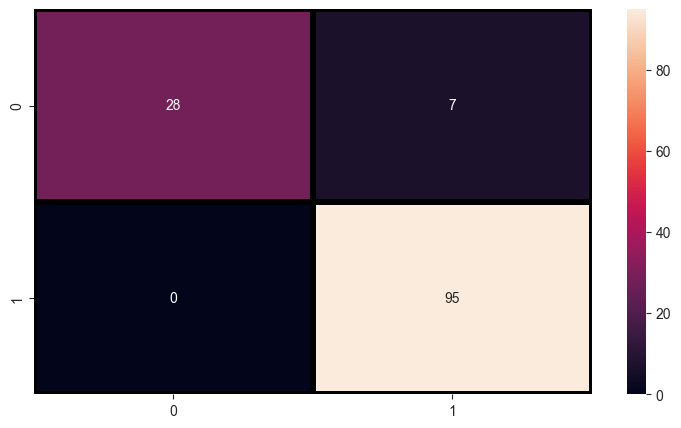

In [46]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predict_results),annot=True,fmt = "d",linecolor="k",linewidths=3)
